# Fashion-Mnist project

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras import models,layers,datasets

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
fashion_mnist = datasets.fashion_mnist

In [8]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
y_test.shape

(10000,)

In [22]:
x_train.ndim

3

In [20]:
x_train[0].ndim

2

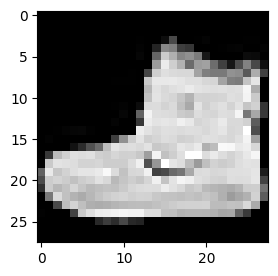

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0],cmap="grey")
plt.show()

In [23]:
# standardizing the data of x_train,x_test
x_train = x_train/255
x_test = x_test/255

In [27]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train[0].shape

(28, 28)

In [55]:
28*28 *1

784

In [56]:
# building the model
model = models.Sequential([
    #cnn
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=16,kernel_size=(1,1),activation="relu"),
    layers.MaxPooling2D((1,1)),
    
    # Adding the Dense layer
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="sigmoid")]);

In [61]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [62]:
model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6945 - loss: 0.8422 - val_accuracy: 0.8217 - val_loss: 0.4937
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8343 - loss: 0.4452 - val_accuracy: 0.8533 - val_loss: 0.3835
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8601 - loss: 0.3761 - val_accuracy: 0.8657 - val_loss: 0.3469
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8715 - loss: 0.3462 - val_accuracy: 0.8615 - val_loss: 0.3579
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8768 - loss: 0.3273 - val_accuracy: 0.8688 - val_loss: 0.3428
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8850 - loss: 0.3067 - val_accuracy: 0.8765 - val_loss: 0.3283
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8915 - loss: 0.2906 - val_accuracy: 0.8853 - val_loss: 0.3153
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8958 - loss: 0

In [63]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8823 - loss: 0.3270


[0.31820419430732727, 0.883400022983551]

In [65]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [66]:
pred[0]

array([4.35408484e-03, 7.52319295e-07, 8.37478414e-03, 1.28372325e-04,
       1.38286175e-02, 8.29729557e-01, 3.41785897e-04, 9.79612470e-01,
       1.40906274e-01, 9.99942660e-01], dtype=float32)

In [67]:
pred_label = [np.argmax(i) for i in pred]

In [68]:
pred_label

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 6,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 9,
 4,
 9,
 2,
 1,
 2,
 6,
 4,
 6,
 5,
 8,
 2,
 2,
 8,
 6,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 2,
 7,
 4,
 2,
 6,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 2,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 6,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 6,
 2,


In [70]:
model_1 = models.Sequential([
    #cnn
    layers.Conv2D(filters=74,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation="relu"),
    layers.MaxPooling2D((2,2)),
    # Adding the Dense layer
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="sigmoid")]);

In [72]:
model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [73]:
history=model_1.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8036 - loss: 0.5526 - val_accuracy: 0.8972 - val_loss: 0.2881
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9026 - loss: 0.2668 - val_accuracy: 0.9042 - val_loss: 0.2577
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9197 - loss: 0.2123 - val_accuracy: 0.9095 - val_loss: 0.2518
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9350 - loss: 0.1757 - val_accuracy: 0.9177 - val_loss: 0.2435
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9486 - loss: 0.1403 - val_accuracy: 0.9177 - val_loss: 0.2445


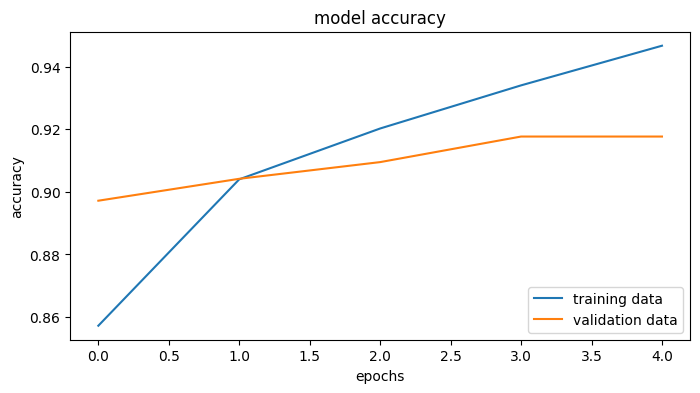

In [74]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["training data","validation data"],loc="lower right")
plt.show()

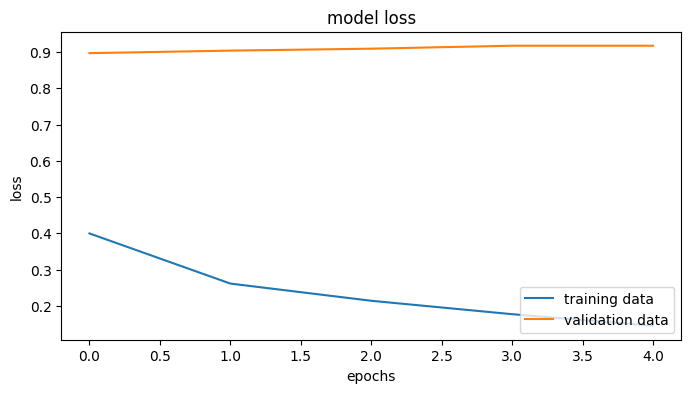

In [75]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["training data","validation data"],loc="lower right")
plt.show()

In [78]:
model_1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9108 - loss: 0.2667


[0.25540128350257874, 0.9136000275611877]

In [80]:
y_pred=model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]